In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
# load the files. as this file contains 100+ columns and 40K rows setting low_memory =False

loan_df =pd.read_csv('C:\Asheesh\loan\loan.csv', low_memory=False)

In [3]:
#looking into the columns, null values, 
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [4]:
#As many columns contains only null, drop those columns 
loan_df = loan_df.dropna(axis=1, how='all')

In [5]:
# Rechecking columns again
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
#dropping those columns too where data is very less  
loan_df = loan_df.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1)                           

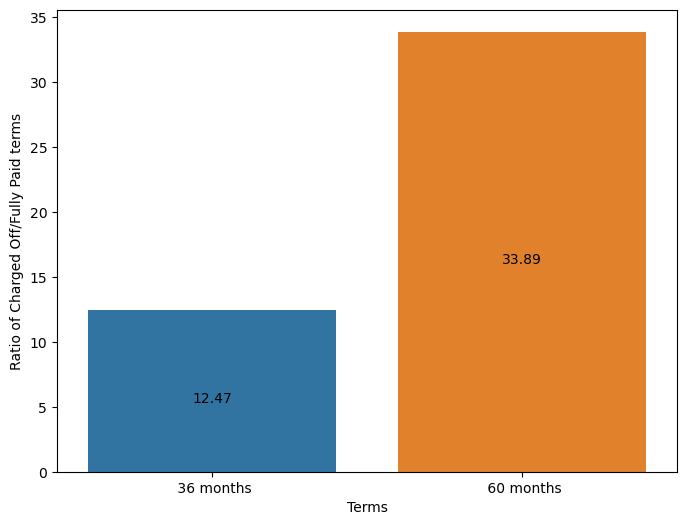

In [7]:
# comprasion of term count for Charged Off and Fully Paid loans

loan_term_df=loan_df[loan_df['loan_status']=='Charged Off']['term'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['term'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_term_df.index, y=loan_term_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
ax.set(xlabel='Terms')
ax.set(ylabel='Ratio of Charged Off/Fully Paid terms')
plt.show()

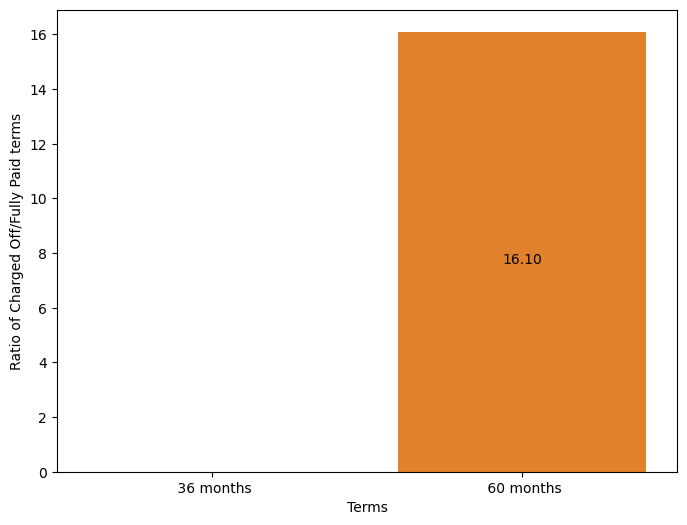

In [8]:
# comprasion of term count for Current and Fully Paid loans
loan_term_df=loan_df[loan_df['loan_status']=='Current']['term'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['term'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_term_df.index, y=loan_term_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
ax.set(xlabel='Terms')
ax.set(ylabel='Ratio of Charged Off/Fully Paid terms')
plt.show()

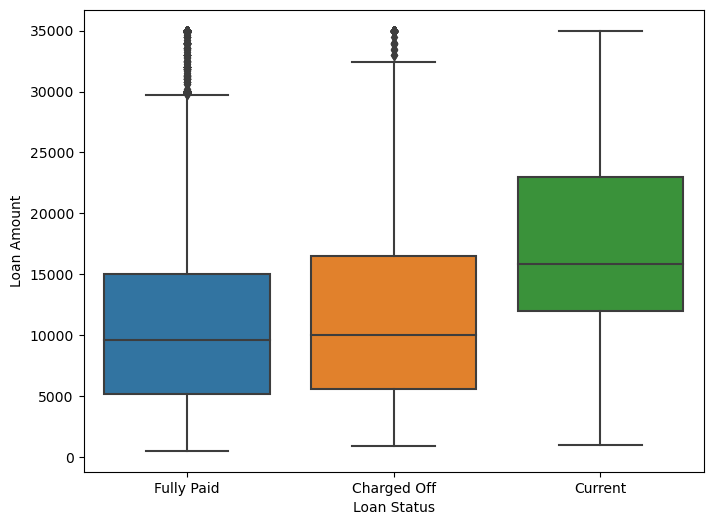

In [9]:
# Box plot for loan amount
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=loan_df['loan_status'], y=loan_df['loan_amnt'])
ax.set(xlabel='Loan Status')
ax.set(ylabel='Loan Amount')
plt.show()

In [10]:
# lets group the data in loan status and find the min, max, mean and median
loan_df.groupby(['loan_status'])['loan_amnt'].agg(['min','max','mean','median'])

,min,max,mean,median
loan_status,,,,
Charged Off,900,35000,12104.385108,10000.0
Current,1000,35000,17053.991228,15825.0
Fully Paid,500,35000,10866.455994,9600.0


In [11]:
# do the required clean up the interest rate

loan_df['int_rate']=loan_df['int_rate'].str.replace('%','').astype('float64')

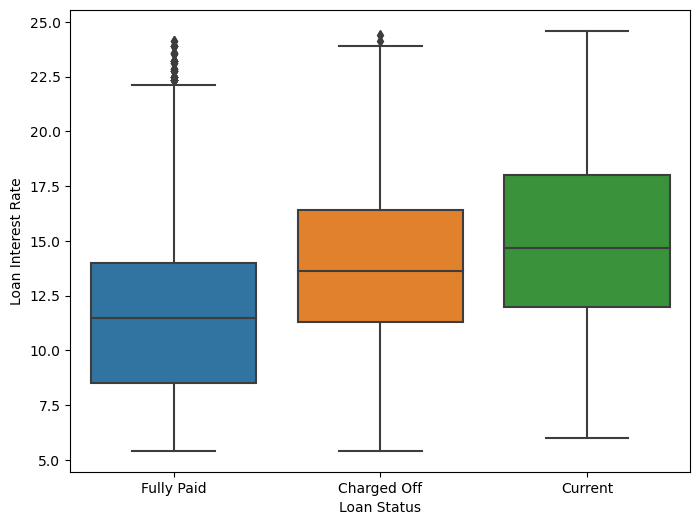

In [12]:
# boxplot of the interest rate to do the comprasion
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=loan_df['loan_status'], y=loan_df['int_rate'])
ax.set(xlabel='Loan Status')
ax.set(ylabel='Loan Interest Rate')
plt.show()

In [13]:
# find the min, max, median, standard deviation and count of the interest rate 
loan_df.groupby('loan_status')['int_rate'].agg(['min','max','mean','median', 'std','count'])

,min,max,mean,median,std,count
loan_status,,,,,,
Charged Off,5.42,24.40,13.820432,13.61,3.654413,5627
Current,6.00,24.59,15.031465,14.65,3.600343,1140
Fully Paid,5.42,24.11,11.609761,11.49,3.599964,32950


In [14]:
# clean up in the employment length, if it is less than <1 and mark it zero and if it is 10+ consider make it 10
loan_df['emp_length']=loan_df['emp_length'].str.replace('year','')
loan_df['emp_length']=loan_df['emp_length'].str.replace('< 1','0')
loan_df['emp_length']=loan_df['emp_length'].str.replace(r'\D+','', regex=True)
loan_df['emp_length']=loan_df['emp_length'].astype('float64')
loan_df.loc[loan_df['emp_length'].isnull(),'emp_length']=math.floor(loan_df[~(loan_df['emp_length'].isnull())]['emp_length'].mean())

In [15]:
# find the min, max, median, standard deviation and count of the employmentlenght  
loan_df.groupby('loan_status')['emp_length'].agg(['min', 'max','median', 'mean', 'count', 'std'])

,min,max,median,mean,count,std
loan_status,,,,,,
Charged Off,0.0,10.0,4.0,5.037142,5627,3.534031
Current,0.0,10.0,6.0,6.007018,1140,3.529376
Fully Paid,0.0,10.0,4.0,4.895053,32950,3.508349


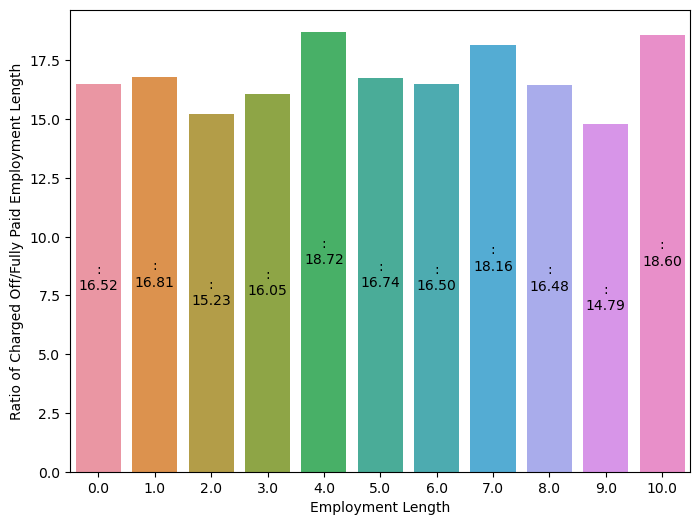

In [16]:
# comprasion of emp_length count for Charged Off and Fully Paid loans
loan_emp_df=loan_df[loan_df['loan_status']=='Charged Off']['emp_length'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['emp_length'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_emp_df.index, y=loan_emp_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(xlabel='Employment Length')
ax.set(ylabel='Ratio of Charged Off/Fully Paid Employment Length')
plt.show()

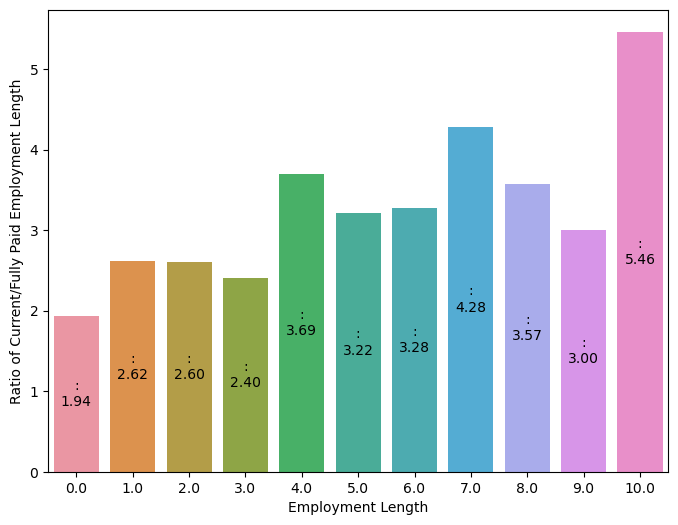

In [17]:
# comprasion of emp_lenght count for Current and Fully Paid loans
loan_emp_df=loan_df[loan_df['loan_status']=='Current']['emp_length'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['emp_length'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_emp_df.index, y=loan_emp_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(xlabel='Employment Length')
ax.set(ylabel='Ratio of Current/Fully Paid Employment Length')
plt.show()

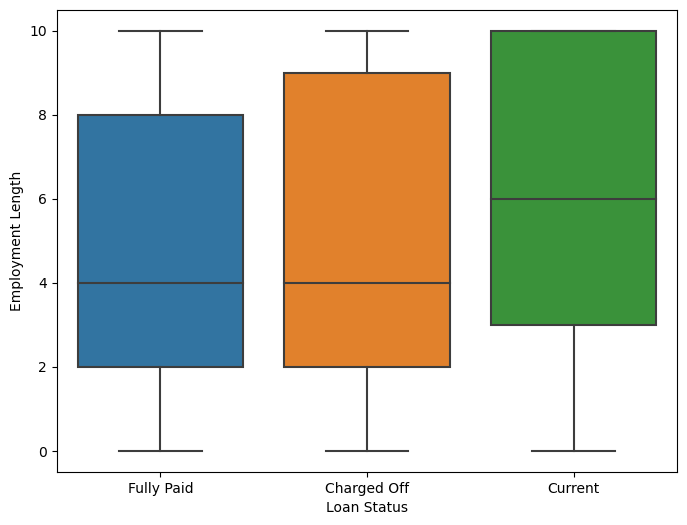

In [18]:
#box plot of employment lenght
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=loan_df['loan_status'], y=loan_df['emp_length'])
ax.set(xlabel='Loan Status')
ax.set(ylabel='Employment Length')
plt.show()

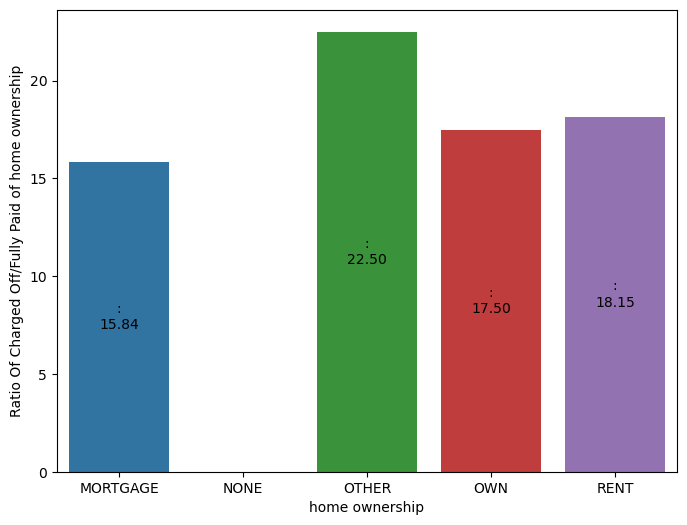

In [19]:
# comprasion of home_ownership count for Charged Off and Fully Paid loans
loan_home_df=loan_df[loan_df['loan_status']=='Charged Off']['home_ownership'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['home_ownership'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_home_df.index, y=loan_home_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(xlabel='home ownership')
ax.set(ylabel='Ratio Of Charged Off/Fully Paid of home ownership')
plt.show()

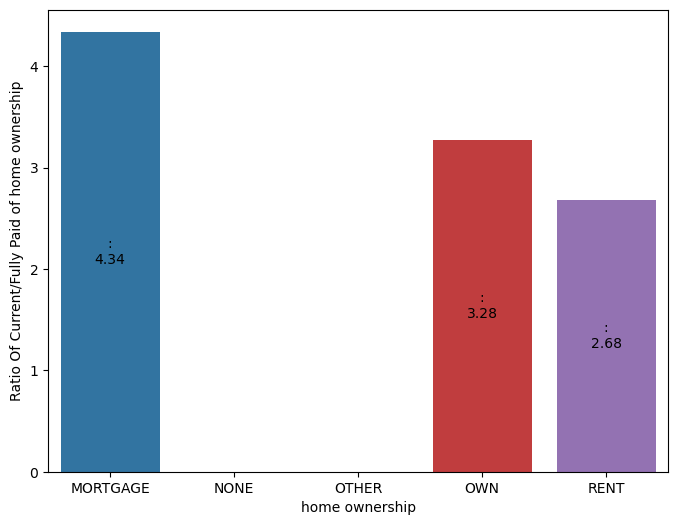

In [20]:
# comprasion of home_ownership count for Current and Fully Paid loans
loan_home_df=loan_df[loan_df['loan_status']=='Current']['home_ownership'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['home_ownership'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_home_df.index, y=loan_home_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(xlabel='home ownership')
ax.set(ylabel='Ratio Of Current/Fully Paid of home ownership')
plt.show()

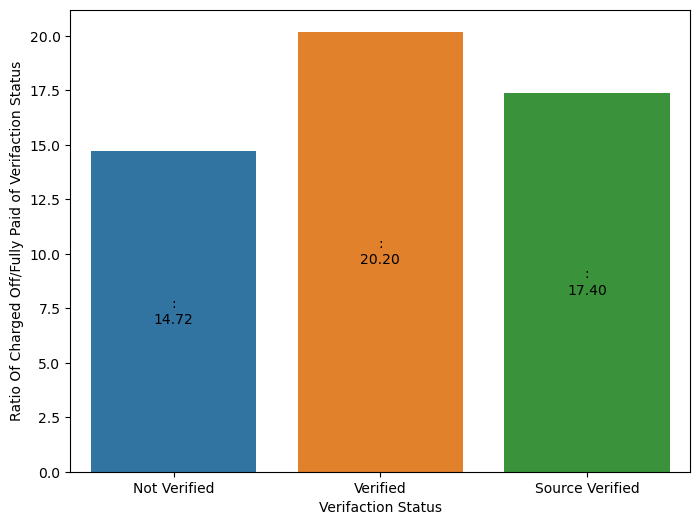

In [21]:
# comprasion of verification_status count for Charged Off and Fully Paid loans
loan_ver_df=loan_df[loan_df['loan_status']=='Charged Off']['verification_status'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['verification_status'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_ver_df.index, y=loan_ver_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(xlabel='Verifaction Status')
ax.set(ylabel='Ratio Of Charged Off/Fully Paid of Verifaction Status')
plt.show()

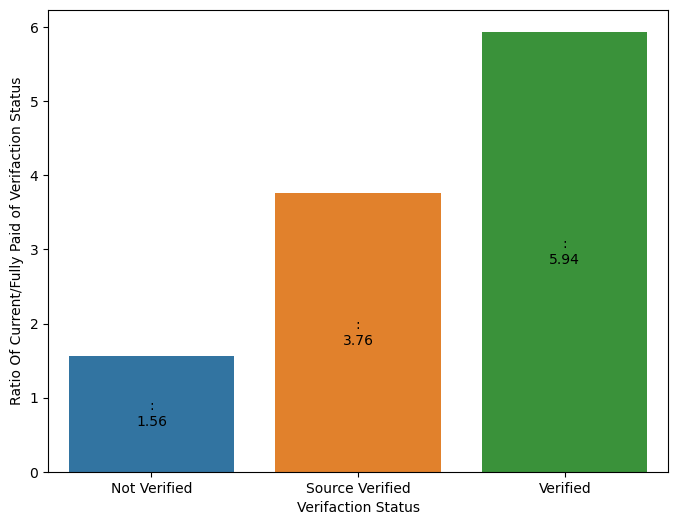

In [22]:
# comprasion of verification_status count for Current and Fully Paid loans
loan_ver_df=loan_df[loan_df['loan_status']=='Current']['verification_status'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['verification_status'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_ver_df.index, y=loan_ver_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(xlabel='Verifaction Status')
ax.set(ylabel='Ratio Of Current/Fully Paid of Verifaction Status')
plt.show()

<Axes: xlabel='verification_status', ylabel='count'>

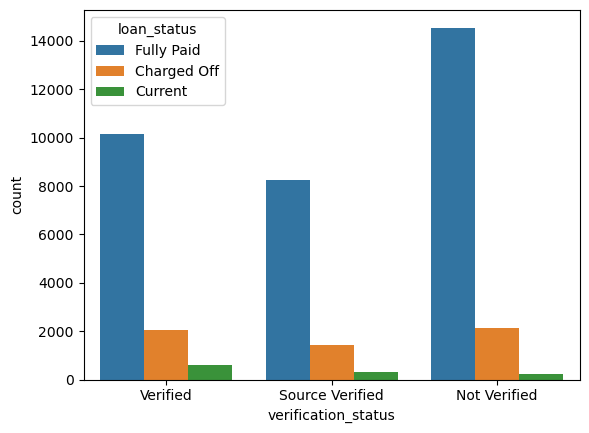

In [23]:
sns.countplot(x='verification_status', hue='loan_status', data=loan_df)

In [24]:
# find the count of each emp_title 
loan_df['emp_title'].value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [25]:
# find the unique count of all emp_title  
loan_df['emp_title'].nunique()

28820

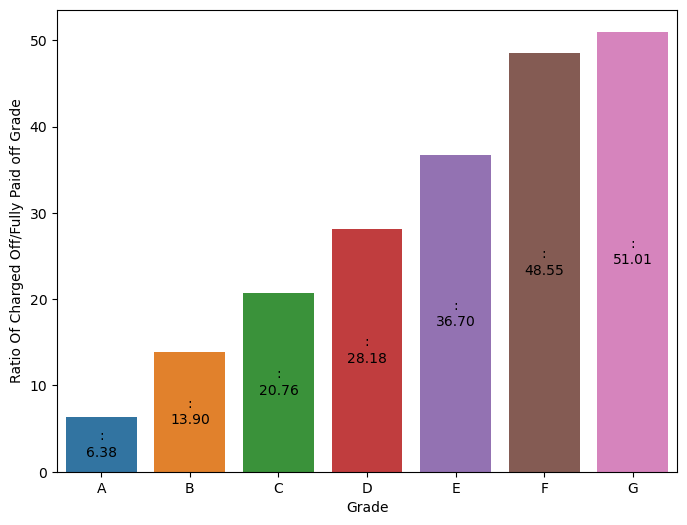

In [26]:
# comprasion of grade count for Charged Off and Fully Paid loans
loan_grade_df=loan_df[loan_df['loan_status']=='Charged Off']['grade'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['grade'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_grade_df.index, y=loan_grade_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(xlabel='Grade')
ax.set(ylabel='Ratio Of Charged Off/Fully Paid off Grade')
plt.show()

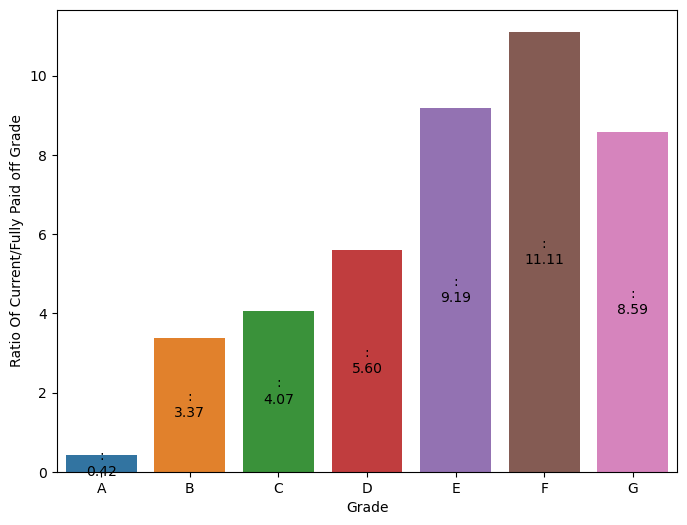

In [27]:
# comprasion of grade count for Current and Fully Paid loans
loan_grade_df=loan_df[loan_df['loan_status']=='Current']['grade'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['grade'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
# add the plot
sns.barplot(x=loan_grade_df.index, y=loan_grade_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(xlabel='Grade')
ax.set(ylabel='Ratio Of Current/Fully Paid off Grade')
plt.show()

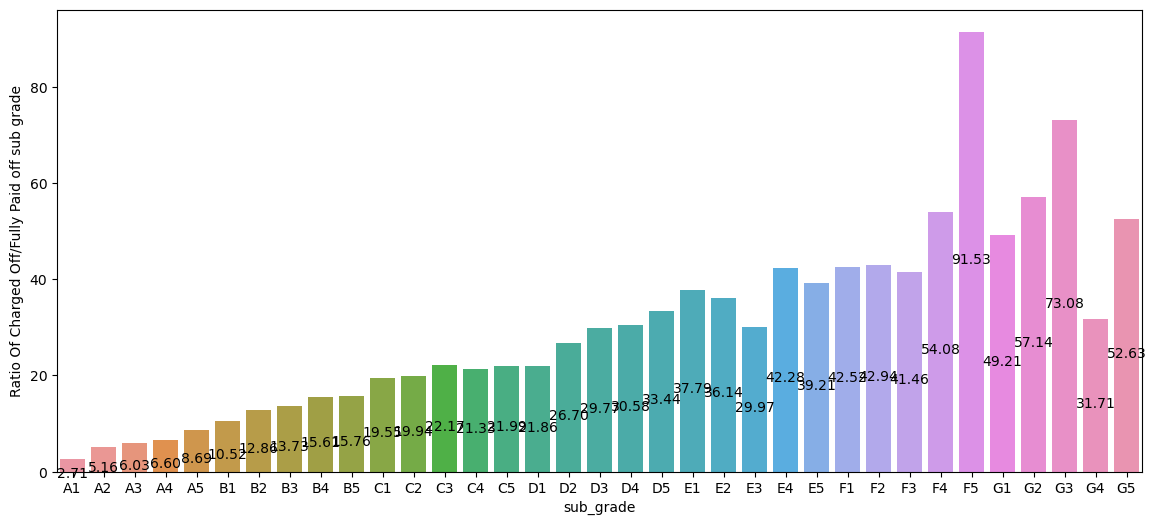

In [28]:
# comprasion of sub grade count for Charged Off and Fully Paid loans
loan_sub_grade_df=loan_df[loan_df['loan_status']=='Charged Off']['sub_grade'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['sub_grade'].value_counts()
fig, ax = plt.subplots(figsize=(14, 6))
# add the plot
sns.barplot(x=loan_sub_grade_df.index, y=loan_sub_grade_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
ax.set(ylabel='Sub Grade')
ax.set(ylabel='Ratio Of Charged Off/Fully Paid off sub grade')
plt.show()

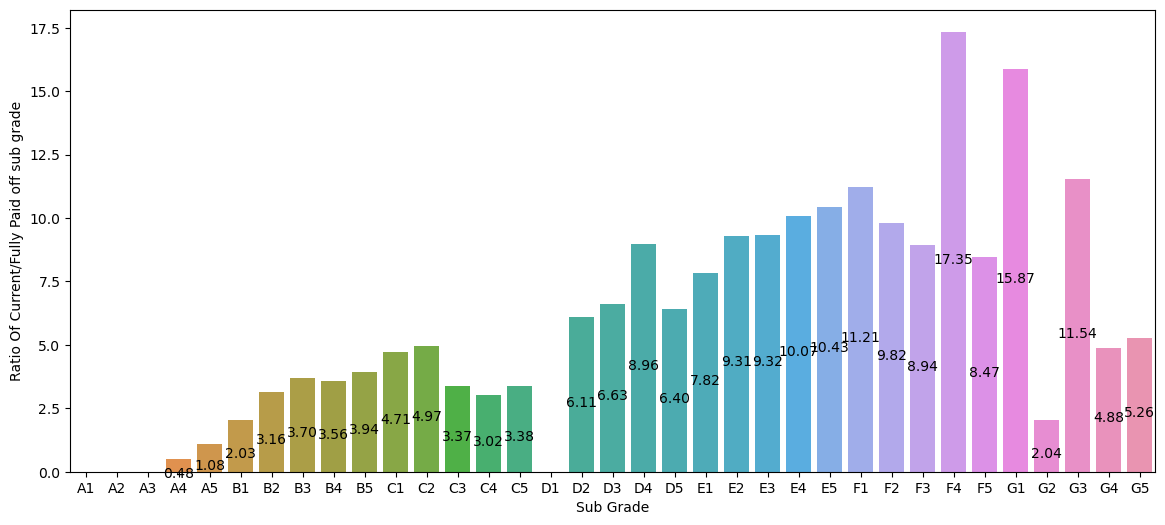

In [29]:
# comprasion of sub grade count for Current and Fully Paid loans
loan_sub_grade_df=loan_df[loan_df['loan_status']=='Current']['sub_grade'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['sub_grade'].value_counts()
fig, ax = plt.subplots(figsize=(14, 6))
# add the plot
sns.barplot(x=loan_sub_grade_df.index, y=loan_sub_grade_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
ax.set(xlabel='Sub Grade')
ax.set(ylabel='Ratio Of Current/Fully Paid off sub grade')
plt.show()

In [30]:
loan_df['sub_grade'].value_counts().sort_values(ascending=False)

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

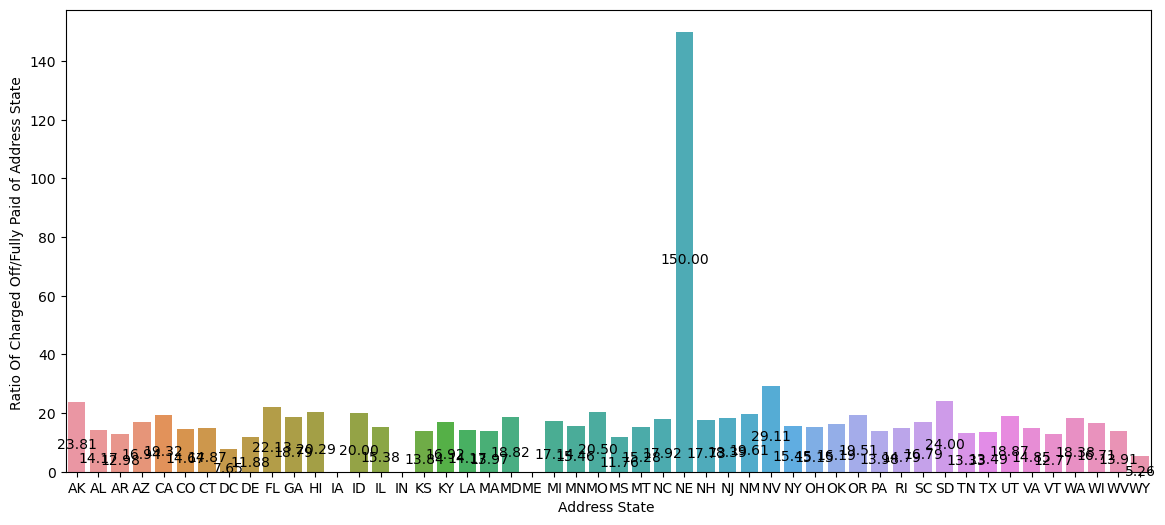

In [31]:
# comprasion of addr_state count for Charged Off and Fully Paid loans

loan_addr_df=loan_df[loan_df['loan_status']=='Charged Off']['addr_state'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['addr_state'].value_counts()
fig, ax = plt.subplots(figsize=(14, 6))
# add the plot
sns.barplot(x=loan_addr_df.index, y=loan_addr_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
ax.set(xlabel='Address State ')
ax.set(ylabel='Ratio Of Charged Off/Fully Paid of Address State ')
plt.show()

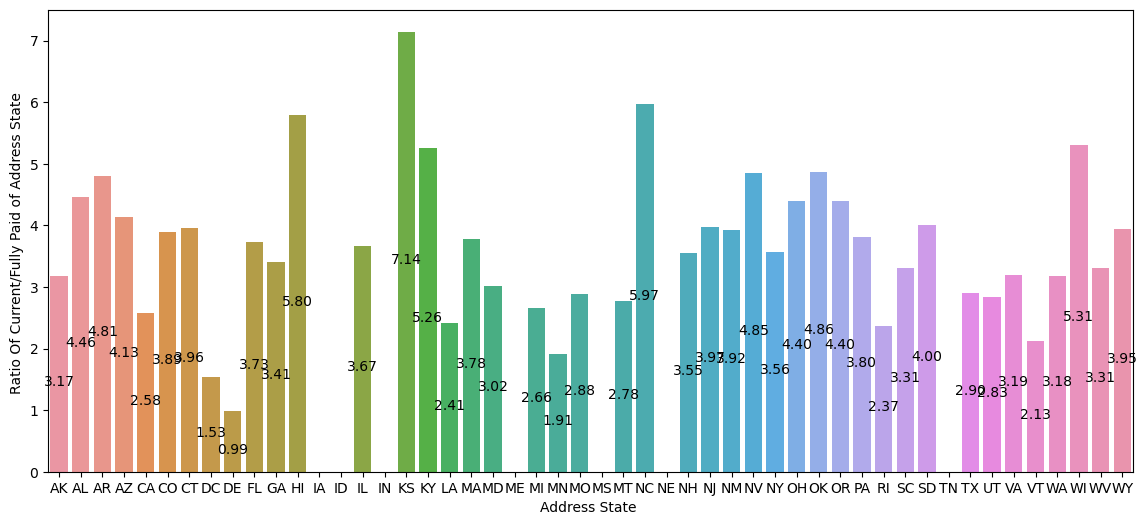

In [32]:
# comprasion of addr_state count for Current and Fully Paid loans
loan_addr_df=loan_df[loan_df['loan_status']=='Current']['addr_state'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['addr_state'].value_counts()
fig, ax = plt.subplots(figsize=(14, 6))
# add the plot
sns.barplot(x=loan_addr_df.index, y=loan_addr_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.2f', label_type='center')
ax.set(xlabel='Address State ')
ax.set(ylabel='Ratio Of Current/Fully Paid of Address State ')
plt.show()

In [33]:
# Create a new column int_rate_ceil to store the ceiling of the int_rate 
loan_df['int_rate_ceil']=loan_df['int_rate'].apply(lambda x: math.ceil(x))

<Axes: xlabel='loan_status', ylabel='int_rate_ceil'>

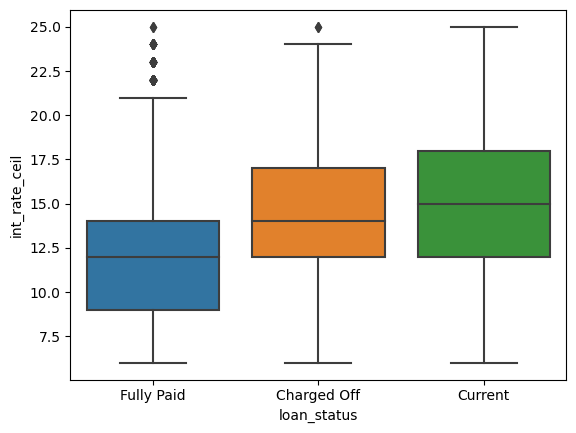

In [34]:
# boxplot of the int_rate_ceil
sns.boxplot(x=loan_df['loan_status'], y=loan_df['int_rate_ceil'])

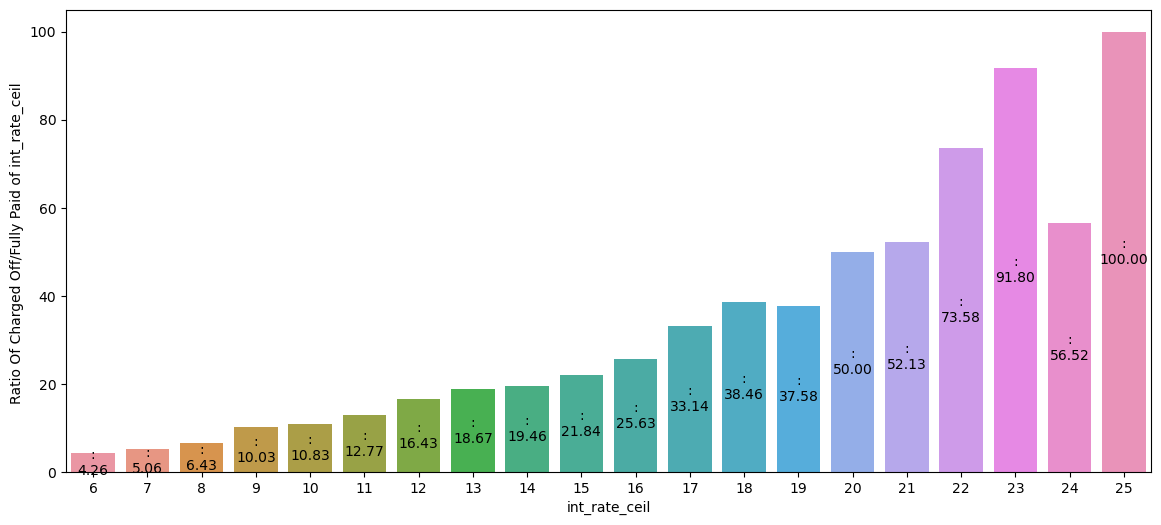

In [35]:
# comprasion of int_rate_ceil count for Charged Off and Fully Paid loans
loan_int_ceil_df=loan_df[loan_df['loan_status']=='Charged Off']['int_rate_ceil'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['int_rate_ceil'].value_counts()
fig, ax = plt.subplots(figsize=(14, 6))
# add the plot
sns.barplot(x=loan_int_ceil_df.index, y=loan_int_ceil_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(ylabel='int_rate_ceil ')
ax.set(ylabel='Ratio Of Charged Off/Fully Paid of int_rate_ceil ')
plt.show()

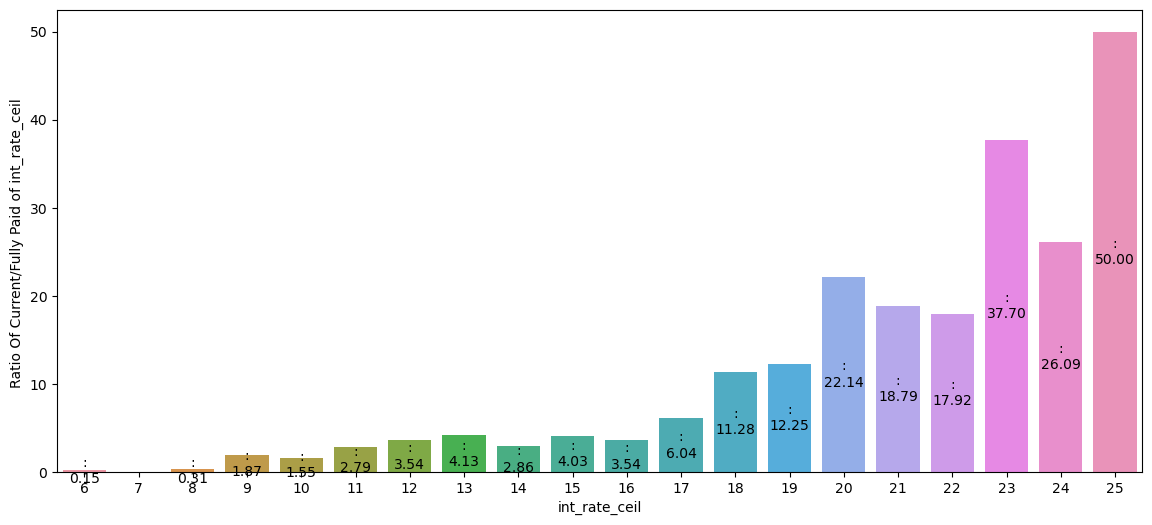

In [36]:
# comprasion of int_rate_ceil count for Current and Fully Paid loans
loan_int_ceil_df=loan_df[loan_df['loan_status']=='Current']['int_rate_ceil'].value_counts()*100/loan_df[loan_df['loan_status']=='Fully Paid']['int_rate_ceil'].value_counts()
fig, ax = plt.subplots(figsize=(14, 6))
# add the plot
sns.barplot(x=loan_int_ceil_df.index, y=loan_int_ceil_df, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt=':\n%.2f', label_type='center')
ax.set(ylabel='int_rate_ceil ')
ax.set(ylabel='Ratio Of Current/Fully Paid of int_rate_ceil ')
plt.show()

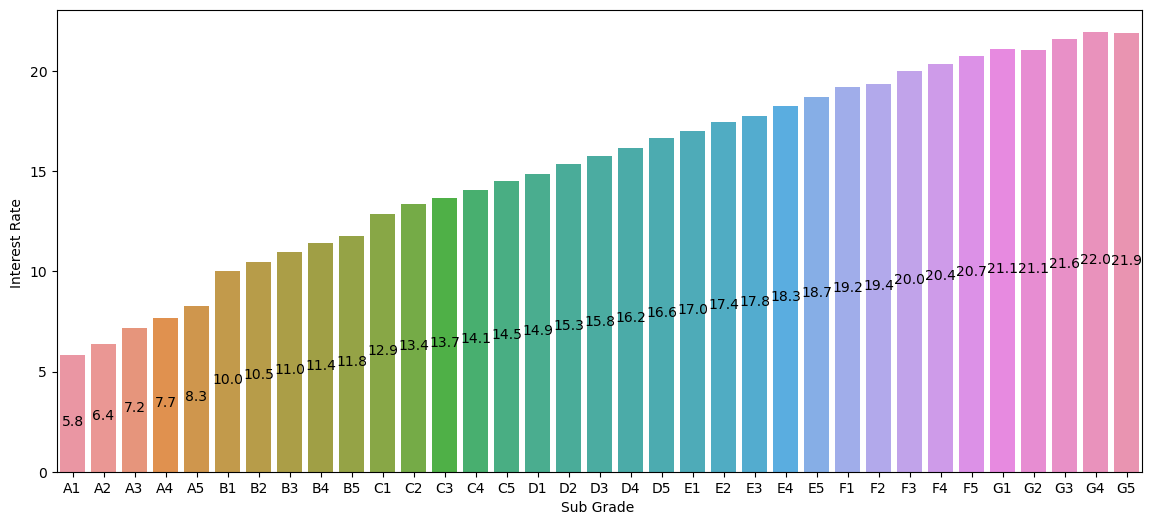

In [37]:
# bar plot of int_rate mean with the sub_grade 
fig, ax = plt.subplots(figsize=(14, 6))
loan_df_int=loan_df.groupby('sub_grade')['int_rate'].mean()
sns.barplot(x=loan_df_int.index, y=loan_df_int, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.1f', label_type='center')
ax.set(xlabel='Sub Grade ')
ax.set(ylabel='Interest Rate ')
plt.show()

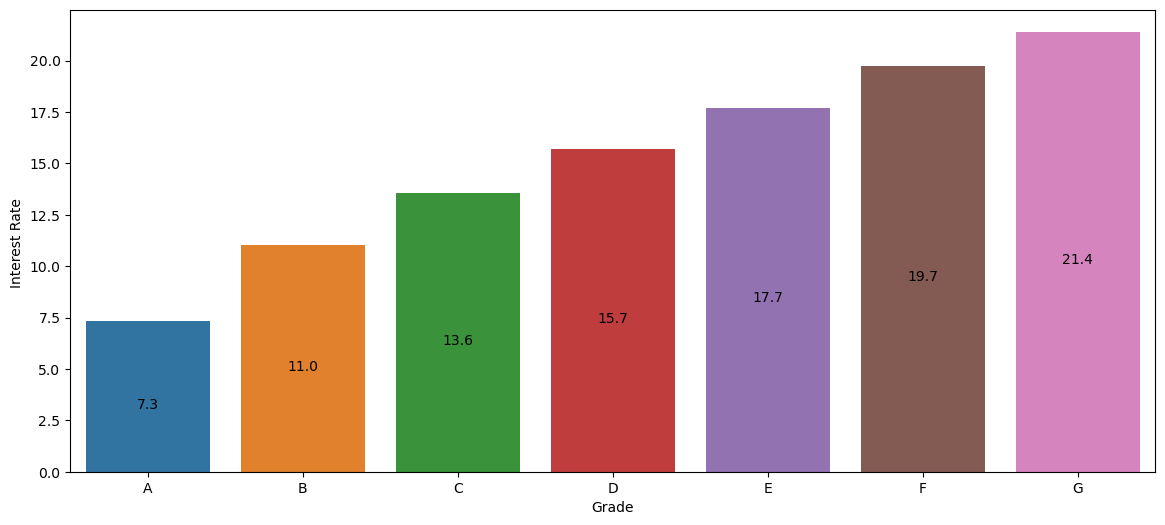

In [38]:
# bar plot of int_rate mean with the grade 
fig, ax = plt.subplots(figsize=(14, 6))
loan_df_int=loan_df.groupby('grade')['int_rate'].mean()
sns.barplot(x=loan_df_int.index, y=loan_df_int, ax=ax)
# add the annotation
ax.bar_label(ax.containers[-1], fmt='\n%.1f', label_type='center')
ax.set(xlabel= 'Grade')
ax.set(ylabel='Interest Rate ')
plt.show()

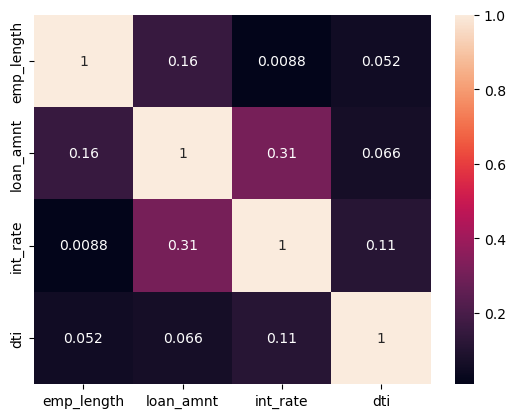

In [39]:
# head map of correlation among emp_length, loan_amnt,int_rate, dti
sns.heatmap(loan_df[['emp_length', 'loan_amnt','int_rate', 'dti']].corr(), annot=True)
plt.show()